In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [3]:
df=pd.read_csv("C:\\Users\\hp\\Desktop\\Book5.csv")

In [4]:
df.head()


,name,age,income
0,rob,27,70000
1,michael,29,90000
2,ismail,29,610000
3,kory,28,150000
4,gautam,42,155000


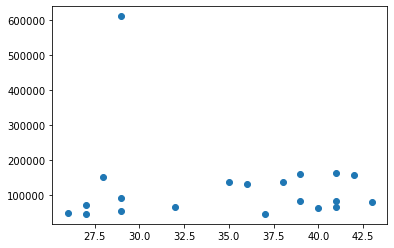

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df['age'],df['income'])

km=KMeans(n_clusters=3)

In [9]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [14]:
y_predicted=km.fit_predict(df[['age','income']])

In [15]:
df['clusters']=y_predicted

In [16]:
df.head()

,name,age,income,clusters
0,rob,27,70000,2
1,michael,29,90000,2
2,ismail,29,610000,1
3,kory,28,150000,0
4,gautam,42,155000,0


In [17]:
df0=df[df.clusters==0]
df1=df[df.clusters==1]
df2=df[df.clusters==2]

Text(0, 0.5, 'income')

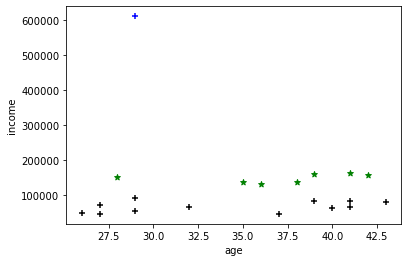

In [24]:
plt.scatter(df0.age,df0.income,color='green',marker='*')
plt.scatter(df1.age,df1.income,color='blue',marker='+')
plt.scatter(df2.age,df2.income,color='black',marker='+')
plt.xlabel('age')
plt.ylabel('income')

In [21]:
df2

,name,age,income,clusters
0,rob,27,70000,2
1,michael,29,90000,2
10,tom,37,45000,2
11,arnold,26,48000,2
12,jared,27,45000,2
13,stark,29,53000,2
14,dipika,32,65000,2
15,priyanka,40,63000,2
16,dipika,41,64000,2
17,alia,43,80000,2


In [28]:
scalar=MinMaxScaler()
scalar.fit(df[['income']])
df['income']=scalar.transform(df[['income']])

In [29]:
scalar.fit(df[['age']])
df['age']=scalar.transform(df[['age']])

In [30]:
df

,name,age,income,clusters
0,rob,0.058824,0.044248,2
1,michael,0.176471,0.079646,2
2,ismail,0.176471,1.000000,1
3,kory,0.117647,0.185841,0
4,gautam,0.941176,0.194690,0
5,david,0.764706,0.203540,0
6,andear,0.882353,0.207080,0
7,brad,0.705882,0.161062,0
8,angelina,0.588235,0.150442,0
9,donald,0.529412,0.162832,0


In [31]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['age','income']])
y_predicted

array([1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [32]:
df['clusters']=y_predicted

In [33]:
df

,name,age,income,clusters
0,rob,0.058824,0.044248,1
1,michael,0.176471,0.079646,1
2,ismail,0.176471,1.000000,2
3,kory,0.117647,0.185841,1
4,gautam,0.941176,0.194690,0
5,david,0.764706,0.203540,0
6,andear,0.882353,0.207080,0
7,brad,0.705882,0.161062,0
8,angelina,0.588235,0.150442,0
9,donald,0.529412,0.162832,0


In [35]:
plt.scatter(km.cluster_center_[:,0],km.cluster_center_[:,1],color='purple',marker='*',label='centroid')

AttributeError: 'KMeans' object has no attribute 'cluster_center_'

Text(0, 0.5, 'income')

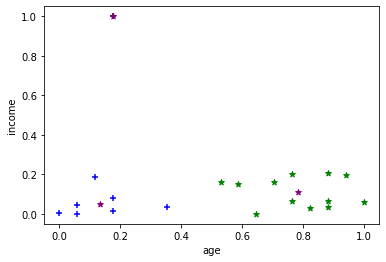

In [39]:
df0=df[df.clusters==0]
df1=df[df.clusters==1]
df2=df[df.clusters==2]
plt.scatter(df0.age,df0.income,color='green',marker='*')
plt.scatter(df1.age,df1.income,color='blue',marker='+')
plt.scatter(df2.age,df2.income,color='black',marker='+')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('age')
plt.ylabel('income')

In [37]:
km.cluster_centers_

array([[0.78431373, 0.11135693],
       [0.13445378, 0.05208597],
       [0.17647059, 1.        ]])

Elbow method

In [89]:
k_rng=range(1,10)

In [90]:
sse=[]


In [91]:
for k in k_rng: 
    km=KMeans(n_clusters=k)
    km.fit(df[['age','income']])
    sse.append(km.inertia_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [92]:

sse



[3.1990007541512875,
 1.1876755836091282,
 0.39990746107032565,
 0.2319314174099431,
 0.1776711367450888,
 0.13790664494089505,
 0.1058013112603396,
 0.07718073245984022,
 0.05344956512776989]

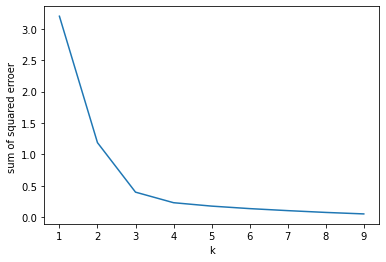

In [93]:

plt.xlabel('k')
plt.ylabel('sum of squared erroer ')
plt.plot(k_rng,sse)